# Lesson 4

## Supervised Learning- Classification Models


---

## Overview

Welcome to this Lesson. We are now going to use our new skills to build our supervised learning models that use a classification approach.

---


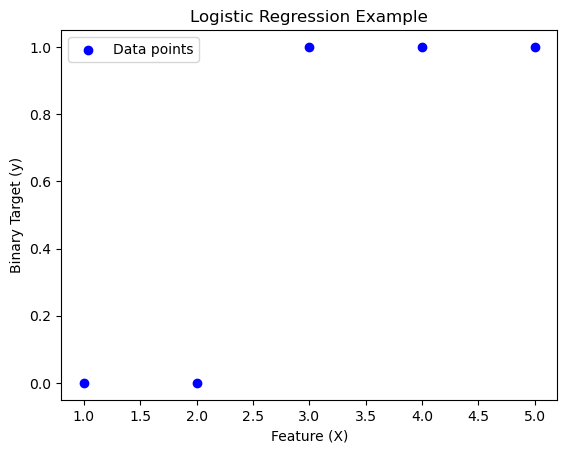

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset with binary outcomes
X = np.array([1, 2, 3, 4, 5])
y = np.array([0, 0, 1, 1, 1])  # Binary target variable

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('Feature (X)')
plt.ylabel('Binary Target (y)')
plt.title('Logistic Regression Example')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reshape X to fit the model
X_reshaped = X.reshape(-1, 1)

# Create and fit the logistic regression model
model = LogisticRegression().fit(X_reshaped, y)

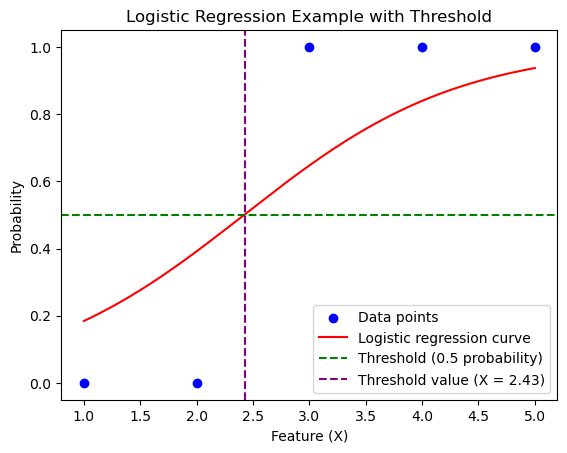

In [5]:


# Generate a range of values for X to plot the logistic regression curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]  # Probability of class 1

# Determine the threshold feature value where the probability is 0.5
threshold_index = np.where(y_prob >= 0.5)[0][0]
threshold_value = X_range[threshold_index]

# Plot the data points and the logistic regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, y_prob, color='red', label='Logistic regression curve')

# Add the threshold lines
plt.axhline(0.5, color='green', linestyle='--', label='Threshold (0.5 probability)')
plt.axvline(threshold_value, color='purple', linestyle='--', label=f'Threshold value (X = {threshold_value[0]:.2f})')

plt.xlabel('Feature (X)')
plt.ylabel('Probability')
plt.title('Logistic Regression Example with Threshold')
plt.legend()
plt.show()

# DEMO 2

In [8]:
# Converting the 'F_1_d_returns' to binary based on whether the value is positive or not
total_returns['F_1_d_returns_Ind'] = total_returns['F_1_d_returns'].apply(lambda x: 1 if x > 0 else 0)
total_returns.head()

F_1_d_returns  1_d_returns  5_d_returns  15_d_returns  \
Ticker Date                                                                
A      2000-02-01           0.08         0.07         0.05          0.03   
       2000-02-02           0.02         0.08         0.12          0.12   
       2000-02-03          -0.02         0.02         0.14          0.17   
       2000-02-04           0.04        -0.02         0.12          0.13   
       2000-02-07          -0.01         0.04         0.20          0.16   

                   20_d_returns  F_1_d_returns_Ind  
Ticker Date                                         
A      2000-02-01         -0.01                  1  
       2000-02-02          0.15                  1  
       2000-02-03          0.25                  0  
       2000-02-04          0.27                  1  
       2000-02-07          0.22                  0

In [9]:
# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
split_date

Timestamp('2017-01-20 00:00:00')

In [11]:
# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]

In [ ]:
total_returns  = test_data['F_1_d_returns']

In [86]:
features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns_Ind']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]

In [88]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [94]:
# Add a constant to the model (intercept)
X_train_scaled_const_add = sm.add_constant(X_train_scaled)
X_test_scaled_const_add  = sm.add_constant(X_test_scaled)

# Fit the model
# Creating and fitting the logistic regression model
model = sm.Logit(y_train, X_train_scaled_const_add).fit()

# Print the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.692570
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      F_1_d_returns_Ind   No. Observations:              1795319
Model:                          Logit   Df Residuals:                  1795314
Method:                           MLE   Df Model:                            4
Date:                Thu, 22 Aug 2024   Pseudo R-squ.:               0.0006058
Time:                        16:34:41   Log-Likelihood:            -1.2434e+06
converged:                       True   LL-Null:                   -1.2441e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0355      0.001     23.789      0.000       0.033       0.038
1_d_returns     -0.0289

In [98]:
model_name = 'Log'
# Make predictions
y_pred = model.predict(X_test_scaled_const_add)

y_test_df = pd.DataFrame(y_test)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.rename(columns={0:model_name}, inplace=True)

y_test_and_pred = pd.merge(y_pred_df, total_returns, left_index=True, right_index=True)


## Evaluation

In [102]:
# Define trading strategy based on Logit
def trading_strategy(y_pred):
    if y_pred >0.5:
        return  1 # Go long
    else:
        return  0  


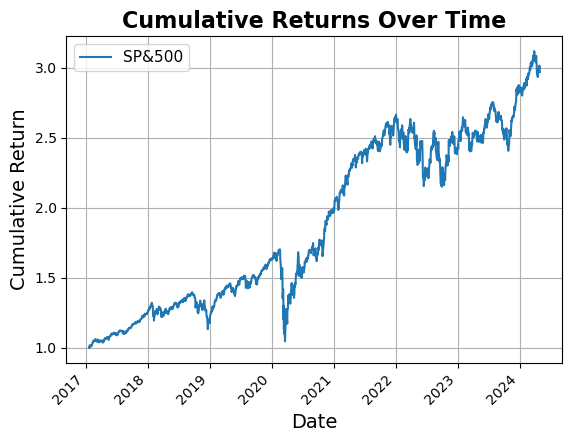

The CAGR is: 16.05%
Sharpe Ratio of Strategy: 0.85


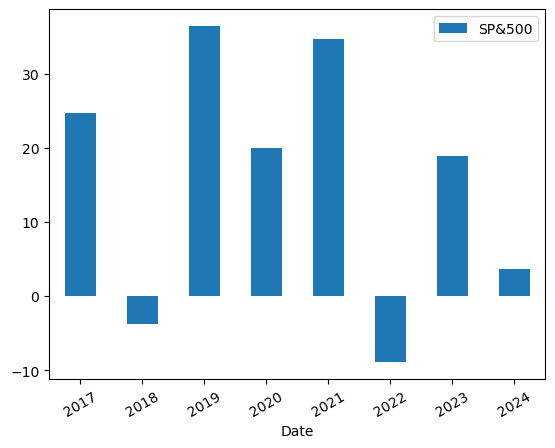

In [111]:
cum_returns, calendar_returns = func_lib.compute_BM_Perf(y_test_and_pred)

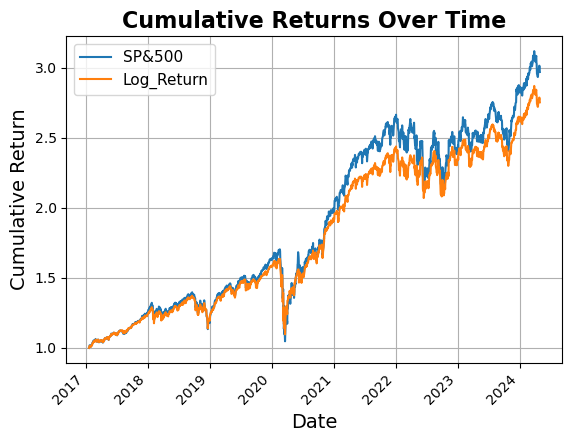

The CAGR is: 14.86%
Sharpe Ratio of Strategy: 0.9


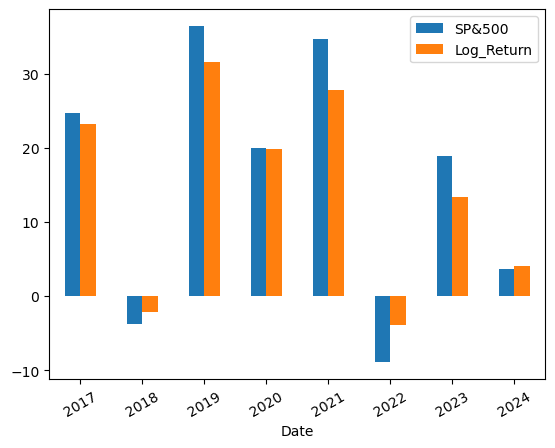

In [113]:

cum_returns, calendar_returns = func_lib.compute_Strat_Perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)

# DEMO 3 Decision Tree


In [ ]:
# Converting the 'F_1_d_returns' to binary based on whether the value is positive or not
total_returns['F_1_d_returns_Ind'] = total_returns['F_1_d_returns'].apply(lambda x: 1 if x > 0 else 0)
total_returns.head()

In [ ]:
# Determine the split index for 70% of the dates
unique_dates = total_returns.index.get_level_values('Date').unique()
split_date = unique_dates[int(0.7 * len(unique_dates))]
split_date

In [ ]:
# Create the training set: all data before the split date
train_data = total_returns.loc[total_returns.index.get_level_values('Date') < split_date]

# Create the testing set: all data from the split date onwards
test_data = total_returns.loc[total_returns.index.get_level_values('Date') >= split_date]b

In [ ]:
total_returns  = test_data['F_1_d_returns']

In [ ]:
features = ['1_d_returns', '5_d_returns', '15_d_returns', '20_d_returns']
target   = ['F_1_d_returns_Ind']

# Split the data into training and testing sets
X_train = train_data[features]
X_test  = test_data[features]
y_train = train_data[target]
y_test  = test_data[target]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [ ]:
# Initialize and train Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

In [ ]:
model_name = 'DecTree'
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, index= X_test_scaled.index)

y_pred_df.rename(columns={0:model_name}, inplace=True)

y_test_df = pd.DataFrame(y_test)


In [ ]:


y_test_and_pred = pd.merge(y_pred_df, total_returns, left_index=True, right_index=True)

In [ ]:
# Define trading strategy based on Logit
def trading_strategy(y_pred):
    if y_pred > 0 :
        return  1 # Go long
    else:
        return  0  


In [ ]:
cum_returns, calendar_returns = func_lib.compute_BM_Perf(y_test_and_pred)

In [ ]:
cum_returns, calendar_returns = func_lib.compute_strat_perf(y_test_and_pred, cum_returns, calendar_returns, trading_strategy, model_name)

# DEMO 4 

In [181]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}


# Initialize Decision Tree classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [176]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train Decision Tree classifier
#model = DecisionTreeClassifier()
#model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
# Convert predictions to a pandas Series with the same index as X_test_scaled
y_pred_df = pd.DataFrame(y_pred, index=X_test_scaled.index)
y_pred_df.rename(columns={0:"y_pred"}, inplace=True)

In [177]:
y_test_and_pred = pd.merge(y_pred_df, total_returns, left_index=True, right_index=True)
#y_test_and_pred = pd.merge(y_test_and_pred, total_returns, left_index=True, right_index=True)

In [178]:
model_name = 'Decision Tree'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        


### XGBoost

In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier with fixed parameters
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5189981645043378
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.29      0.36    424391
           1       0.53      0.73      0.61    468011

    accuracy                           0.52    892402
   macro avg       0.51      0.51      0.49    892402
weighted avg       0.51      0.52      0.49    892402



In [34]:
best_xgb_model

NameError: name 'best_xgb_model' is not defined

In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier with fixed parameters
xgb_model = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    random_state=42
)

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


NameError: name 'X_train_scaled' is not defined

In [ ]:
model_name = 'XGBoost'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 


In [ ]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
std   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean/std

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

In [ ]:
cum_returns.plot()
# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')
# Display the plot
plt.show()

In [ ]:
ann_returns = (pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns.loc[:,[f'{model_name}_Return']]  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

### Elastic Net

In [835]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.001, l1_ratio=0.5) 
model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.001)

In [836]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_df = pd.DataFrame(y_pred, index= X_test_scaled.index)
y_pred_df.rename(columns={0:"y_pred"}, inplace=True)
y_test_and_pred = pd.merge(y_test_df, y_pred_df, left_index=True, right_index=True)

In [837]:
model_name = 'ElasticNet'
# Define trading strategy based on RSI
def trading_strategy(y_pred):
    if y_pred >0:
        return  1 # Go long
    else:
        return 0
        
# Apply trading strategy to each RSI value
y_test_and_pred['Position'] = y_test_and_pred['y_pred'].transform(trading_strategy)
# Create Returns for each Trade
y_test_and_pred[f'{model_name}_Return'] = y_test_and_pred['F_1_d_returns'] *  y_test_and_pred['Position'] 

In [838]:
# Compute the daily mean of all stocks. This will be our equal weighted benchmark
daily_mean  = pd.DataFrame(y_test_and_pred.loc[:,f'{model_name}_Return'].groupby(level='Date').mean())

# Convert daily returns to cumulative returns
cum_returns.loc[:,f'{model_name}_Return'] = pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).cumprod())

In [839]:
# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns[f'{model_name}_Return'].iloc[-1]
beginning_value = cum_returns[f'{model_name}_Return'].iloc[1]

ratio = ending_value/beginning_value
# Compute the Compound Annual Growth Rate (CAGR)
cagr = round((ratio**(1/number_of_years)-1)*100,2)

print(f'The CAGR is: {cagr}%')
# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
mean  = daily_mean[[f'{model_name}_Return']].describe().iloc[1,:] * 252
std   = daily_mean[[f'{model_name}_Return']].describe().iloc[2,:] * pow(252,1/2)

# Compute the Sharpe Ratio and print it out
sharpe  = mean/std

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')

The CAGR is: 15.99%
Sharpe Ratio of Strategy: 0.88


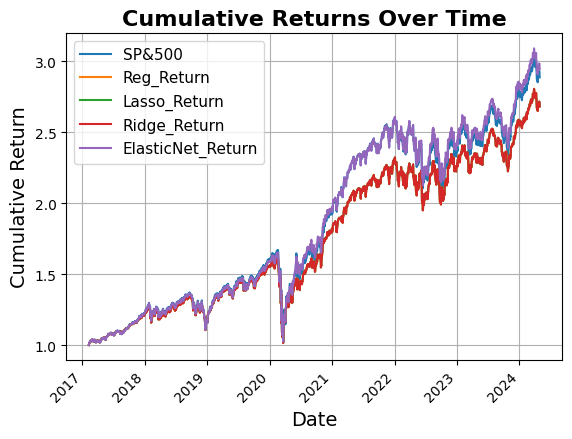

In [840]:
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

In [841]:
ann_returns = (pd.DataFrame((daily_mean[[f'{model_name}_Return']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns.loc[:,[f'{model_name}_Return']]  = pd.DataFrame(ann_returns[f'{model_name}_Return'].groupby(daily_mean.index.get_level_values(0).year).last())
calendar_returns.hvplot.bar(rot=30,  legend='top_left').opts(multi_level=False) 

:Bars   [Date,Variable]   (value)